In [1]:
import multiprocessing
import numpy as np
import xarray as xr
import os
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import linregress
from scipy.optimize import curve_fit
import math

In [ ]:
#T_effect_Q10

In [2]:
path1 = 'D:Data/Fluxnet/All_hourly_data/'

days = 10

for csv_file1 in os.listdir(path1):
    for Ti in np.arange(-10,35,2):
        ln_R_all = ['lnR']
        normalized_T_all = ['normalized_T']
        num_all = ['num']
        numi = 0
        
        if csv_file1[0] == 'F':
            if csv_file1[31:33] =='HH':
                hours = 48
            else:
                hours = 24
        else:
            if csv_file1[27:29] =='HH':
                hours = 48
            else:
                hours = 24
        
        data1 = pd.read_csv(path1+csv_file1)
        m,n = data1.shape
        hour = (data1['TIMESTAMP_START']%10000).astype(int)
        
        for i in range(int(m/hours/days)-1):
            houri = hour[i*days*hours:(i+1)*days*hours]
            Ti_0 = data1['TA_F_MDS'].values[i*days*hours:(i+1)*days*hours][(houri>=1900) | (houri<=700)]
            RECOi_0 = data1['RECO_NT_VUT_REF'].values[i*days*hours:(i+1)*days*hours][(houri>=1900) | (houri<=700)]
            T_QCi_0 = data1['TA_F_MDS_QC'].values[i*days*hours:(i+1)*days*hours][(houri>=1900) | (houri<=700)]              
            Ti_1 = Ti_0[(Ti_0!=-9999) & (RECOi_0!=-9999) & (RECOi_0>0.01) & (T_QCi_0==0)]                        
            RECOi_1 = RECOi_0[(Ti_0!=-9999)& (RECOi_0!=-9999) & (RECOi_0>0.01) & (T_QCi_0==0)]        
            if len(Ti_1) > 100:
                numi+=1
                Normal_Ti_1 = (Ti_1-10)/10
                ln_RECOi_1 = np.log(RECOi_1)
                                        
                Normal_T_ik = Normal_Ti_1[(Ti_1>=Ti-5) & (Ti_1<Ti+5)]
                ln_R_ik   =   ln_RECOi_1[(Ti_1>=Ti-5) & (Ti_1<Ti+5)]
                T_ik   =   Ti_1[(Ti_1>=Ti-5) & (Ti_1<Ti+5)]
                num_ik = np.zeros((len(Normal_T_ik)))
                num_ik[:] = numi
                                        
                if len(Normal_T_ik)>=15:
                    T_ik_85th = np.percentile(T_ik,90)
                    T_ik_15th = np.percentile(T_ik,10)
                    if T_ik_85th-T_ik_15th>6:
                        normalized_T_all+=Normal_T_ik.tolist()
                        ln_R_all+=ln_R_ik.tolist()
                        num_all+=num_ik.tolist()
    
        result = np.array([normalized_T_all, ln_R_all, num_all])
        result_pd = pd.DataFrame(result.T)
        
        folder_path = 'D:/RECO_T_sensitivity/T_sensitivity_data/LMX_data_T_effect_result3_nighttime/'+csv_file1[4:10]  # 替换为你想要创建文件夹的路径
        # 使用os模块的makedirs函数创建文件夹，设置exist_ok=True可以覆盖已存在的文件夹
        os.makedirs(folder_path, exist_ok=True)
        
        save_path = 'D:/RECO_T_sensitivity/T_sensitivity_data/LMX_data_T_effect_result3_nighttime/'+csv_file1[4:10]+'/'+csv_file1[4:10]+'_'+str(Ti)+'.csv'
        result_pd.to_csv(save_path, index= 'a', header= False)

In [ ]:
#No_T_effect_each_year_Q10

In [12]:
path1 = 'D:Data/Fluxnet/AllHourlyData_year3/'

days = 10

for csv_file1 in os.listdir(path1):
    if 1:
        
        if csv_file1[31:33] =='HH':
            hours = 48
        else:
            hours = 24
            
        data = pd.read_csv(path1+csv_file1)

        year = (data['TIMESTAMP_START']/100000000).astype(int)
        month = np.round(data['TIMESTAMP_START']/1000000).astype(int)%100
        unique_values = np.unique(year)
        m,n = data1.shape
        
        for i in range(len(unique_values)):
            
            ln_R_all = ['lnR']
            normalized_T_all = ['normalized_T']
            num_all = ['num']
            numj = 0
            
            Ti_0 = data['TA_F_MDS'].values
            RECOi_0 = data['RECO_NT_VUT_REF'].values
            T_QCi_0 = data['TA_F_MDS_QC'].values
            
            Ti = Ti_0[(year==unique_values[i])]       
            T_QCi = T_QCi_0[(year==unique_values[i])]
            RECOi = RECOi_0[(year==unique_values[i])]
            m = len(Ti)
            
            if m > hours*320:
                for j in range(int(m/hours/days)-1):
                    Tj = Ti[i*days*hours:(j+1)*days*hours]
                    T_QCj = T_QCi[i*days*hours:(j+1)*days*hours]
                    RECOj = RECOi[i*days*hours:(j+1)*days*hours]
                
                    Tj_1 = Tj[(Tj!=-9999) & (RECOj!=-9999) & (RECOj>0.001) & (T_QCj==0)]
                    RECOj_1 = RECOj[(Tj!=-9999) & (RECOj!=-9999) & (RECOj>0.001) & (T_QCj==0)]
            
            
                    if len(Tj_1) > hours*days*0.9:
                        numj+=1
                        Normal_Tj_1 = (Tj_1-10)/10
                        ln_RECOj_1 = np.log(RECOj_1)          
                        num_jk = np.zeros((len(Normal_Tj_1)))
                        num_jk[:] = numj       
                        normalized_T_all+=Normal_Tj_1.tolist()
                        ln_R_all+=ln_RECOj_1.tolist()
                        num_all+=num_jk.tolist()
            
                result = np.array([normalized_T_all, ln_R_all, num_all])
                result_pd = pd.DataFrame(result.T)
        
                folder_path = 'D:/RECO_T_sensitivity/T_sensitivity_data/LMX_data_No_T_effect_result2/'+csv_file1[4:10]  # 替换为你想要创建文件夹的路径
                # 使用os模块的makedirs函数创建文件夹，设置exist_ok=True可以覆盖已存在的文件夹
                os.makedirs(folder_path, exist_ok=True)
        
                save_path = 'D:/RECO_T_sensitivity/T_sensitivity_data/LMX_data_No_T_effect_result2/'+csv_file1[4:10]+'/'+csv_file1[4:10]+'_'+str(unique_values[i])+'.csv'
                result_pd.to_csv(save_path, index= 'a', header= False)

In [35]:
data = pd.read_csv('D:Data/Fluxnet/AllHourlyData_year3/FLX_DE-Kli_FLUXNET2015_FULLSET_HH_2004-2014_1-4.csv')

year = (data['TIMESTAMP_START']/100000000).astype(int)
month = np.round(data['TIMESTAMP_START']/1000000).astype(int)%100
unique_values = np.unique(year)
m,n = data1.shape
        
ln_R_all = ['lnR']
normalized_T_all = ['normalized_T']
num_all = ['num']
numj = 0
            
Ti_0 = data['TA_F_MDS'].values
RECOi_0 = data['RECO_NT_VUT_REF'].values
T_QCi_0 = data['TA_F_MDS_QC'].values

i=4

Ti = Ti_0[(year==unique_values[i])]       
T_QCi = T_QCi_0[(year==unique_values[i])]
RECOi = RECOi_0[(year==unique_values[i])]

Tj_1 = Ti[(Ti!=-9999) & (RECOi!=-9999) & (RECOi>0.001) & (T_QCi==0)]
RECOj_1 = RECOi[(Ti!=-9999) & (RECOi!=-9999) & (RECOi>0.001) & (T_QCi==0)]
            
Normal_Tj_1 = (Tj_1-10)/10
ln_RECOj_1 = np.log(RECOj_1)          

C:\Users\111\AppData\Local\Temp\ipykernel_14012\1194212298.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


<Axes: >

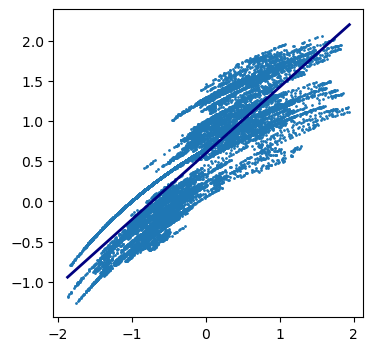

In [36]:
import seaborn as sns
fig = plt.figure(figsize=(4, 4),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('Blues')

ax.scatter(Normal_Tj_1, ln_RECOj_1, s=1)

sns.regplot(x=Normal_Tj_1, y=ln_RECOj_1, ci=95, color='navy', scatter= False, line_kws={'linewidth':2}, label = 'r = 0.49  p = 1.49×10$^{\u221257}$')


In [21]:
Normal_Tj_1

array([], dtype=float64)